In [1]:
# THIS IS USED TO ANALYSE THE OUTPUT FROM ROCKSTAR
# TRANSLATED FROM IDL CODES OF HAO

In [2]:
%matplotlib inline
import numpy as np
import astropy.io.fits as fits
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import math as m
import PyAstronomy as PA
import galpy.util.bovy_coords as gub

In [3]:
# parameters
dpath = "/Users/htian/Documents/work/data/RockData/"
fn_in = "xyz_10_0_0.dat"
fn_out = "output_xyz_10_0_0_rock_10_1_1.txt"
nptc = 100001 # partical number in each prg
nprg = 33     # number of progenitors

In [12]:
# load input data
data_in = np.loadtxt(dpath+fn_in)
x_in,y_in,z_in = data_in[:,0]*1000/0.7,data_in[:,1]*1000/0.7,data_in[:,2]*1000/0.7
u_in,v_in,w_in = data_in[:,3],data_in[:,4],data_in[:,5]
Lx = y_in * w_in - z_in * v_in
Ly = z_in * u_in - x_in * w_in
Lz = x_in * v_in - y_in * u_in
Lxy = np.sqrt(Lx**2+Ly**2)
partid = data_in[:,6]                           # particle ID in the full dataset
prgid = (partid-partid%nptc)/nptc               # progenitor IDs of each particle
np_in = len(x_in)
# plt.scatter(u_in,v_in,s=1,c=(prgid*47)%255,alpha=1)
# plt.plot(u_in,v_in,'k.',alpha=0.5,markersize=5)
# plt.show()
#  load output data 
pstt, psed, lvl, opid = np.loadtxt(dpath+fn_out,\
        dtype={'names':('pstt','psed','lvl','opid'),\
        'formats':(int,int,int,int)},unpack=True,\
                                  usecols=(0,1,3,4))
# pstt, psed, lvl, opid = data_op[:,0],data_op[:,1], data_op[:,3],data_op[:,4]
max_lvl = int(np.max(lvl))
print('A hierarchical tree with {max_lvl} levels was built by ROCKSTAR.'.format(**locals()))
rcd_lvl = np.zeros((np_in,max_lvl+1))-1
for ilvl in range(0,max_lvl+1):
    ind = lvl == ilvl
    rcd_lvl[opid[ind],ilvl] = pstt[ind]
np.savetxt(dpath+'rcd_lvl.txt',rcd_lvl)

# rcd_lvl = np.load
tag_part = np.zeros((np_in,max_lvl+1))-1
trcd0 = rcd_lvl[:,0]
u_trcd = np.unique(trcd0)
tid = 0
for i in range(0,len(u_trcd)):
    indt = trcd0==u_trcd[i]
    tag_part[indt,0] = tid
    tid = tid+1
tid = 0
for i in range(1,max_lvl+1):
    tag_part[:,i] = tag_part[:,i-1]
    trcd0 = rcd_lvl[:,i]
    u_trcd = np.unique(trcd0)
    su_trcd = np.sort(u_trcd)
    for j in range(1,len(su_trcd)):
        indt = trcd0 == su_trcd[j]
        tag_part[indt,i] = tid
        tid = tid+1

    

A hierarchical tree with 13 levels was built by ROCKSTAR.


15


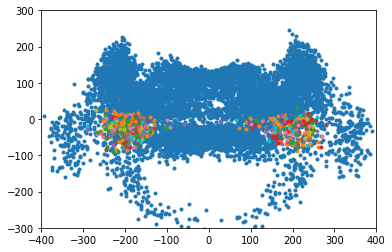

In [19]:
# plot results
plot_lvl = 13
rlvl = tag_part[:,plot_lvl]
# rlvl = rcd_lvl[:,plot_lvl]
sid = np.unique(rlvl)
ns = len(sid)
nmb_s = np.zeros(ns)
for i in range(0,ns):
    nmb_s[i] = len(rlvl[rlvl==sid[i]])
sind = np.argsort(nmb_s)[::-1]
ssid = sid[sind]
snmb = nmb_s[sind]
print(ns)
for i in range(0,ns-1):
    ind = rlvl==ssid[i]
    if len(rlvl[ind])>10 :
        plt.plot(u_in[ind],v_in[ind],'o',markersize=3,alpha=1)
        plt.axis([-400,400,-300,300])
#         plt.show()

In [6]:
a = np.zeros((2,3))
print(a)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]
